## **CS351 LAB PROJECT NOTEBOOK**
***Submitted By: M.Hanzla Javaid(2018271) Usman Zaib(2018352)***

## **Data Preprocessing and feature engineering**

In [ ]:
#Mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
#Reading dataset as a Pandas dataframe
df = pd.read_csv('drive/MyDrive/Dataset.csv')
#First 5 samples
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
#Analysis of data
print(df['service'].value_counts())
print(df['flag'].value_counts())
print(df['protocol_type'].value_counts())

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
harvest          2
aol              2
http_2784        1
Name: service, Length: 70, dtype: int64
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


In [ ]:
#Dimensionality reduction based on two factors observed from above
#1) Columns which have very low mean indicating low frequency 
#2) Columns which have sparse classes with disproportionate data i.e service and flag. We are doing this because Kmeans clustering struggles with one hot encoded data.
df = df.drop([
              'land',
              'urgent',
              'num_outbound_cmds',
              'num_shells',
              'is_host_login',
              'su_attempted',
              'root_shell',
              'num_failed_logins',
              'wrong_fragment',
              'num_access_files',
              'num_file_creations',
              'su_attempted',
              'dst_host_same_srv_rate',
              'dst_host_diff_srv_rate',	
              'dst_host_same_src_port_rate',
              'dst_host_srv_diff_host_rate'	,
              'dst_host_serror_rate'	,
              'dst_host_srv_serror_rate'	,
              'dst_host_rerror_rate',	
              'dst_host_srv_rerror_rate',
              'is_guest_login',
              'service',
              'flag',
              ],
              axis=1)

In [ ]:
#Opening attack types file
attackTypesFile = open('drive/MyDrive/Attack_types.txt')
#Creating a list to store pairs of attack category and corresponding attack_type
attackTypes = []

In [ ]:
#A loop iterating over the opened file to update attackTyes list with valid pairs
for line in attackTypesFile:
  #Spliting the line on base of a space character, creating a list
  category_type = line.split()
  #Storing above obtained list into main attackTypes list
  attackTypes.append(category_type)
#Closing the file
attackTypesFile.close()

In [ ]:
#A loop iterating over the attackTypes list to update corresponding values in the dataframe's attack_category algorithm
for value in attackTypes:
  #Updating attack_category algorithm
  df.loc[(df.attack_category == value[0]),'attack_category']=value[1]

In [ ]:
#Creating one hot encoded vectors for Protocol Type
one_hot_vectors = pd.get_dummies(df.protocol_type, prefix='protocol_type')
#Droping attack category because it is not useful now
df = df.drop('protocol_type',axis = 1)
#Appending one hot encoded vectors with the dataframe
df = df.join(one_hot_vectors)

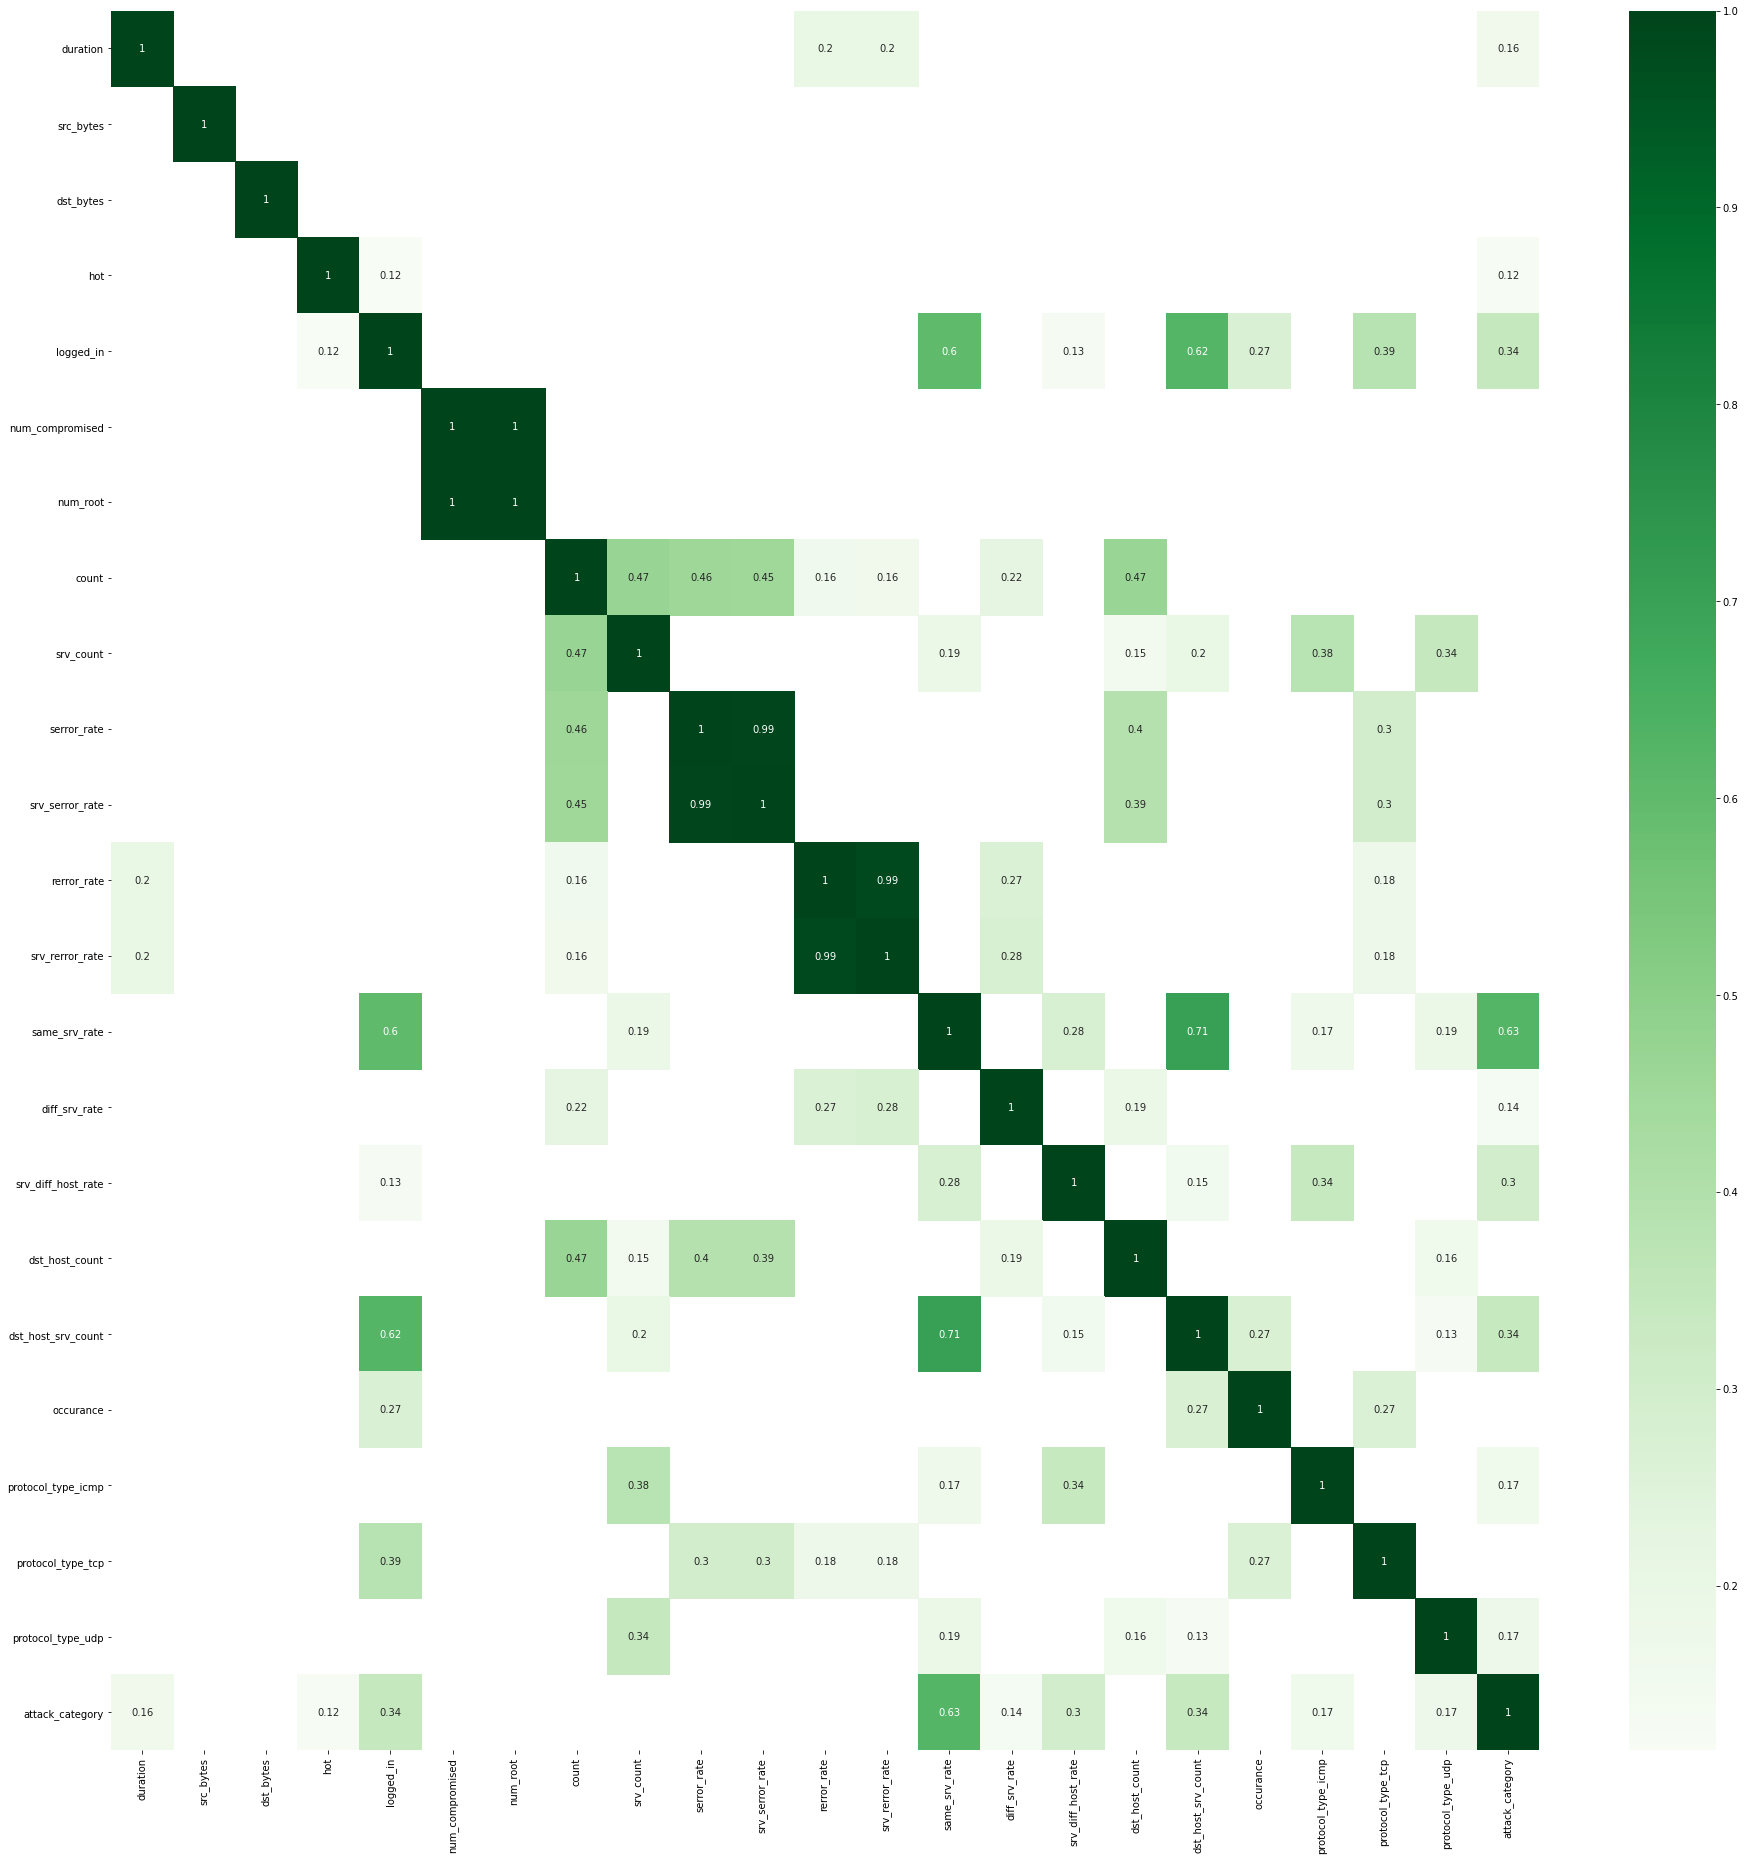

In [ ]:
labelencoder = LabelEncoder()
df_temp = df
attack_category = labelencoder.fit_transform(df_temp['attack_category'])
df_temp = df_temp.drop('attack_category',axis=1)
df_temp['attack_category'] = attack_category
#Observing correlations of each features in dataset
corrmat = df_temp.corr()
kot = corrmat[corrmat>0.11]
plt.figure(figsize=(32,32))
#plot heat map
g=sns.heatmap(kot,annot=True,cmap="Greens")

In [ ]:
#Creating one hot encoded vectors for Attack Category
one_hot_vectors = pd.get_dummies(df.attack_category,prefix = 'attack_category')
#Droping attack category because it is not useful now
df = df.drop('attack_category',axis = 1)
#Appending one hot encoded vectors with the dataframe
df = df.join(one_hot_vectors)

In [ ]:
df.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,occurance,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,attack_category_dos,attack_category_normal,attack_category_probe,attack_category_r2l,attack_category_u2r
0,0,491,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,20,0,1,0,0,1,0,0,0
1,0,146,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,15,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,19,0,1,0,1,0,0,0,0
3,0,232,8153,0,1,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,21,0,1,0,0,1,0,0,0
4,0,199,420,0,1,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,21,0,1,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   src_bytes               125973 non-null  int64  
 2   dst_bytes               125973 non-null  int64  
 3   hot                     125973 non-null  int64  
 4   logged_in               125973 non-null  int64  
 5   num_compromised         125973 non-null  int64  
 6   num_root                125973 non-null  int64  
 7   count                   125973 non-null  int64  
 8   srv_count               125973 non-null  int64  
 9   serror_rate             125973 non-null  float64
 10  srv_serror_rate         125973 non-null  float64
 11  rerror_rate             125973 non-null  float64
 12  srv_rerror_rate         125973 non-null  float64
 13  same_srv_rate           125973 non-null  float64
 14  diff_srv_rate       

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,occurance,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,attack_category_dos,attack_category_normal,attack_category_probe,attack_category_r2l,attack_category_u2r
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.204409,0.395736,0.279250,0.302192,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,19.504060,0.065816,0.815167,0.119018,0.364578,0.534583,0.092528,0.007899,0.000413
std,2604.51531,5.870331e+06,4.021269e+06,2.149968,0.489010,23.942042,24.399618,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,2.291503,0.247961,0.388164,0.323810,0.481314,0.498805,0.289771,0.088522,0.020313
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,1.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,21.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,77.000000,1.000000,7479.000000,7468.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


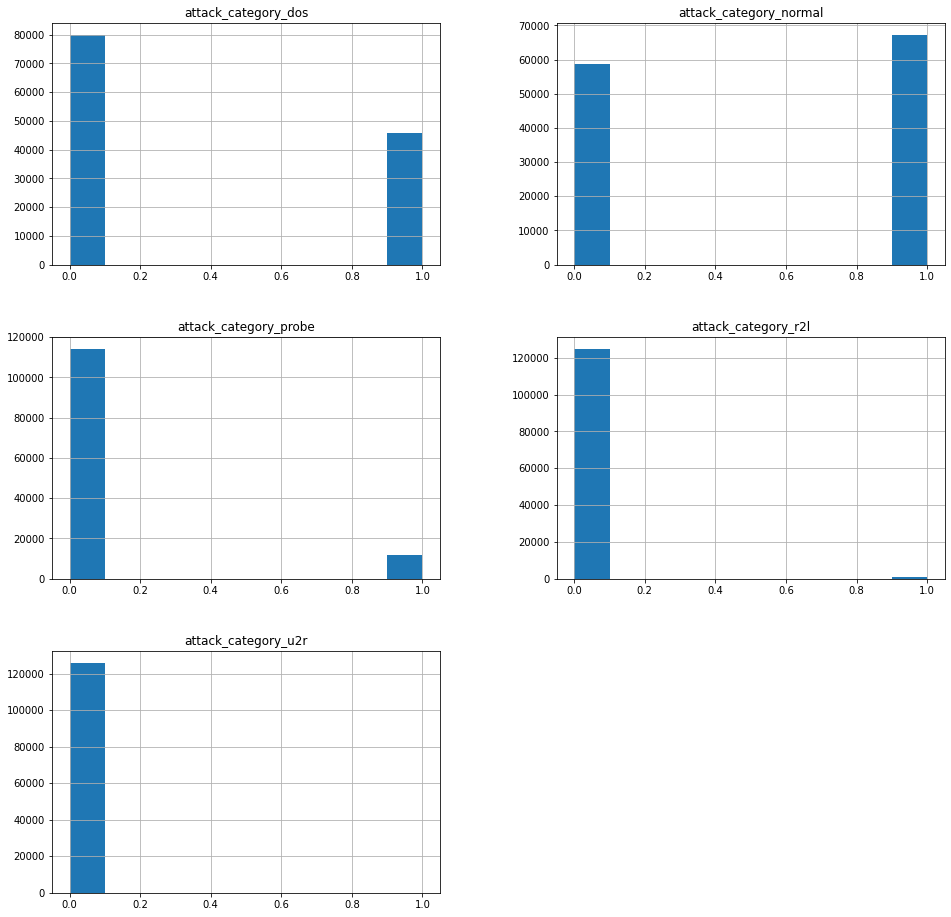

In [ ]:
#This histogram indicates how the 5 class labels are divided. It is very clear that most dominant category is "normal"(almost 50%) followed by "dos"(almost 40%).
cols = df.columns[-5:]
ax = df.hist(cols,figsize=(16,16))

## **Ensemble Learning using Neural Networks (Supervised)**

In [ ]:
#Importing libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from keras.models import load_model
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Input
from keras.layers import Dense,BatchNormalization
from keras.layers.merge import concatenate
from numpy import argmax

In [ ]:
#Preparing data for training and testing. 25% of data will be used for testing purpose
X = df.iloc[:,:-5].values
Y = df.iloc[:,-5:].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)
standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train = standardscaler.transform(X_train)
X_test = standardscaler.transform(X_test)

In [ ]:
#Function to create a new model
def create_model(n_hidden,neurons):
  model = Sequential()
  #Setting input dimensions 22 because this will remain fixed for all ANN variations
  #Setting all activations fixed to 'relu'
  model.add(BatchNormalization())
  model.add(Dense(neurons[0], input_dim=22, activation='relu'))
  for i in range(1,n_hidden):
    model.add(Dense(neurons[i],activation='relu'))
  #softmax activation is used for classification
  model.add(Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
#Funtion to train model
def train_model(X,y,model,callback_monitor,patience,epochs):
  #Instantiating call back
  callback = EarlyStopping(monitor=callback_monitor, patience=patience)
  #hist will store the important metrics during the training procedure
  hist = model.fit(X,y,validation_split = 0.25,epochs = epochs,verbose = 2,callbacks=[callback],batch_size = 3600)
  return model,hist

In [ ]:
#Creating,training and saving 5 models
#Initialzing configurations
histories = []
n_models = 5
n_hidden = [1,2,2,2,1]
n_neurons = [
             [6],[10,5],[5,5],[16,8],[8]
]
n_callback_monitors = ['val_loss','val_accuracy','loss','accuracy','loss']
n_patience = [2,3,2,1,1]
n_epochs = [5,5,5,5,5]
#Loop to generate desired models
for i in range(0,n_models):
  model = create_model(n_hidden[i],n_neurons[i])
  print("Training model# "+str(i))
  model, hist = train_model(X_train,Y_train,model,n_callback_monitors[i],n_patience[i],n_epochs[i])
  histories.append(hist)
  path_to_save = "models_part2/model#" + str(i) +".h5"
  model.save(path_to_save)
  print("Model saved as " + path_to_save )

Training model# 0
Epoch 1/5
20/20 - 1s - loss: 1.8632 - accuracy: 0.1650 - val_loss: 1.7437 - val_accuracy: 0.1862
Epoch 2/5
20/20 - 0s - loss: 1.6623 - accuracy: 0.2485 - val_loss: 1.5690 - val_accuracy: 0.3189
Epoch 3/5
20/20 - 0s - loss: 1.4917 - accuracy: 0.4255 - val_loss: 1.4020 - val_accuracy: 0.5133
Epoch 4/5
20/20 - 0s - loss: 1.3170 - accuracy: 0.5380 - val_loss: 1.2265 - val_accuracy: 0.5428
Epoch 5/5
20/20 - 0s - loss: 1.1441 - accuracy: 0.5468 - val_loss: 1.0666 - val_accuracy: 0.5470
Model saved as models_part2/model#0.h5
Training model# 1
Epoch 1/5
20/20 - 1s - loss: 1.6746 - accuracy: 0.2657 - val_loss: 1.5809 - val_accuracy: 0.3568
Epoch 2/5
20/20 - 0s - loss: 1.5049 - accuracy: 0.4623 - val_loss: 1.4381 - val_accuracy: 0.6369
Epoch 3/5
20/20 - 0s - loss: 1.3695 - accuracy: 0.7448 - val_loss: 1.3052 - val_accuracy: 0.7996
Epoch 4/5
20/20 - 0s - loss: 1.2295 - accuracy: 0.8280 - val_loss: 1.1585 - val_accuracy: 0.8431
Epoch 5/5
20/20 - 0s - loss: 1.0743 - accuracy: 0.85

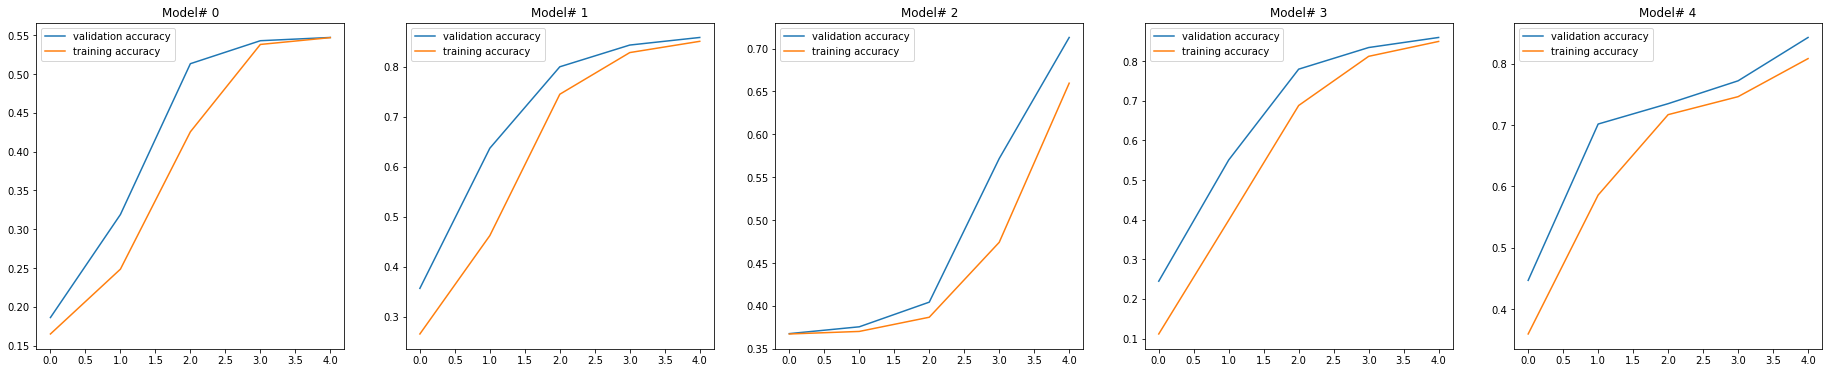

In [ ]:
#Plotting graphs of validation accuracy with respect to epochs
fig = plt.figure(figsize = (32,6))
for i in range(0,5):
  ax = fig.add_subplot(1,5,i+1)
  ax.set_title("Model# " + str(i))
  ax.plot(histories[i].history['val_accuracy'],label='validation accuracy')
  ax.plot(histories[i].history['accuracy'],label='training accuracy')
  ax.legend()

In [ ]:
#Function to load all models from directory
def load_all_models(n_models,dir):
	models = []
	for i in range(n_models):
		# define filename for this ensemble
		path_to_load = str(dir)+"/model#" + str(i) +".h5"
		# load model from file
		model = load_model(path_to_load)
		# add to list of members
		models.append(model)
		print("loaded " + str(path_to_load))
	return models

In [ ]:
models_list = load_all_models(5,'models_part2')

loaded models_part2/model#0.h5
loaded models_part2/model#1.h5
loaded models_part2/model#2.h5
loaded models_part2/model#3.h5
loaded models_part2/model#4.h5


In [ ]:
#Function to evaluate all models on test data
def evaluate_models(X,y,models):
  for i in range(0,5):
    print("Evaluating model# "+str(i))
    loss,accuracy = models[i].evaluate(X,y,verbose=0)
    print("Loss: " + str(loss) +" Accuracy: "+str(accuracy))

In [ ]:
#Evaluating each model with train data
evaluate_models(X_test,Y_test,models_list)

Evaluating model# 0
Loss: 1.0624526739120483 Accuracy: 0.5455642342567444
Evaluating model# 1
Loss: 0.9902317523956299 Accuracy: 0.8585444688796997
Evaluating model# 2
Loss: 1.0697047710418701 Accuracy: 0.7202006578445435
Evaluating model# 3
Loss: 0.9312862157821655 Accuracy: 0.860767126083374
Evaluating model# 4
Loss: 0.6426429152488708 Accuracy: 0.8396520018577576


In [ ]:
#Function to create ensambled model
def create_ensembled_model(model_list,X,y):
  #Converting one hot encoded labels back to categorical vector to make it compatible with SVC
  Y = [np.where(r==1)[0][0] for r in y] 
  count = 0
  input_layer = []
  raw_output_layers = []
  X_train_input = []
  #Loop to turn off trainable status of all layers
  for model in model_list:
    for layer in model.layers:
      layer.trainable = False
      layer._name = "ensembled_"+str(count)+layer.name
      count = count + 1
    input_layer.append(model.input)
    raw_output_layers.append(model.output)
  merge = concatenate(raw_output_layers)
  ensembled_model_nn = Model(inputs=input_layer,outputs=merge)
  #Replicating input vector 5 times to make it functional with ensembled model
  for i in range(0,len(ensembled_model_nn.input)):
    X_train_input.append(X)
  ensembled_model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #Getting feature vector from neural network consisting of 5 ANN concatenated
  output_nn = ensembled_model_nn.predict(X_train_input)
  #Instantiating SVC
  esembled_model_svc = SVC() ###BONUS PART IMPLEMENTATION
  #Training SVC with feature vectore and train labels
  esembled_model_svc.fit(output_nn,Y)
  #Visualization of neural network part
  plot_model(ensembled_model_nn,show_shapes=True,to_file='model_visualization.png')
  #Returning trained nn and svc
  return ensembled_model_nn,esembled_model_svc

In [ ]:
def predict_ensembled_model(nn,svc,X):
  #Replicating input vector 5 times to make it functional with ensembled model
  X_input = []
  for i in range(0,len(nn.input)):
    X_input.append(X)
  #Getting NN output
  nn_feature_vector = nn.predict(X_input)
  #Getting final labels from SVC
  prediction = svc.predict(nn_feature_vector)
  return prediction

In [ ]:
nn,svc = create_ensembled_model(models_list,X_train,Y_train)

In [ ]:
#Getting predictions from ensemble model
pred = predict_ensembled_model(nn,svc,X_test)

In [ ]:
#Function to evaluate ensemble model
def evaluate_ensembled_model(Y_true,Y_predicted):
  #Converting one hot encoded labels back to categorical vector to make it compatible with SVC
  y = [np.where(r==1)[0][0] for r in Y_true]
  #Returning accuracy score
  return accuracy_score(y,Y_predicted)

In [ ]:
#A clear improvement of 10% is observed for test data as compared to previous results of individual ANN's
ensembled_accuracy = evaluate_ensembled_model(Y_test,pred)
print("Ensemble model accuracy: " + str(ensembled_accuracy))

Ensemble model accuracy: 0.9845367371562838


##**Classification using K-means clustering (Unsupervised)**

In [ ]:
#Importing libraries
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
#Preparing data for unsupervised learning
X = df.iloc[:,:-5].values
#Scaling data between 0 and 1 using min max scaler. We did not do this for NN's training becauese there we have used batch normalization
standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)

In [ ]:
#Instantiating K-means model for 5 clusters
model = KMeans(n_clusters=5,max_iter=100)
#Fitting with data
model.fit(X)
#Getting labels(unupervised)
predicted_unsupervised = model.predict(X)

In [ ]:
#Creating sepeate copy of dataset which will be used to store unsupervised label obtained from K-means clustering
df_unsupervised = df.drop(df.columns[-5:],axis=1)
df_unsupervised.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,occurance,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,491,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,20,0,1,0
1,0,146,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,15,0,0,1
2,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,19,0,1,0
3,0,232,8153,0,1,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,21,0,1,0
4,0,199,420,0,1,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,21,0,1,0


In [ ]:
#Creating a pandas series from labels vector
attack_category = pd.Series(predicted_unsupervised)

In [ ]:
#Creating new column in new data frame
df_unsupervised['attack_category'] = attack_category

In [ ]:
#Observing the frequency of label. Its proportion almost matches how the actual data is divided
df_unsupervised['attack_category'].value_counts()

2    52345
0    35109
1    23331
3    15187
4        1
Name: attack_category, dtype: int64

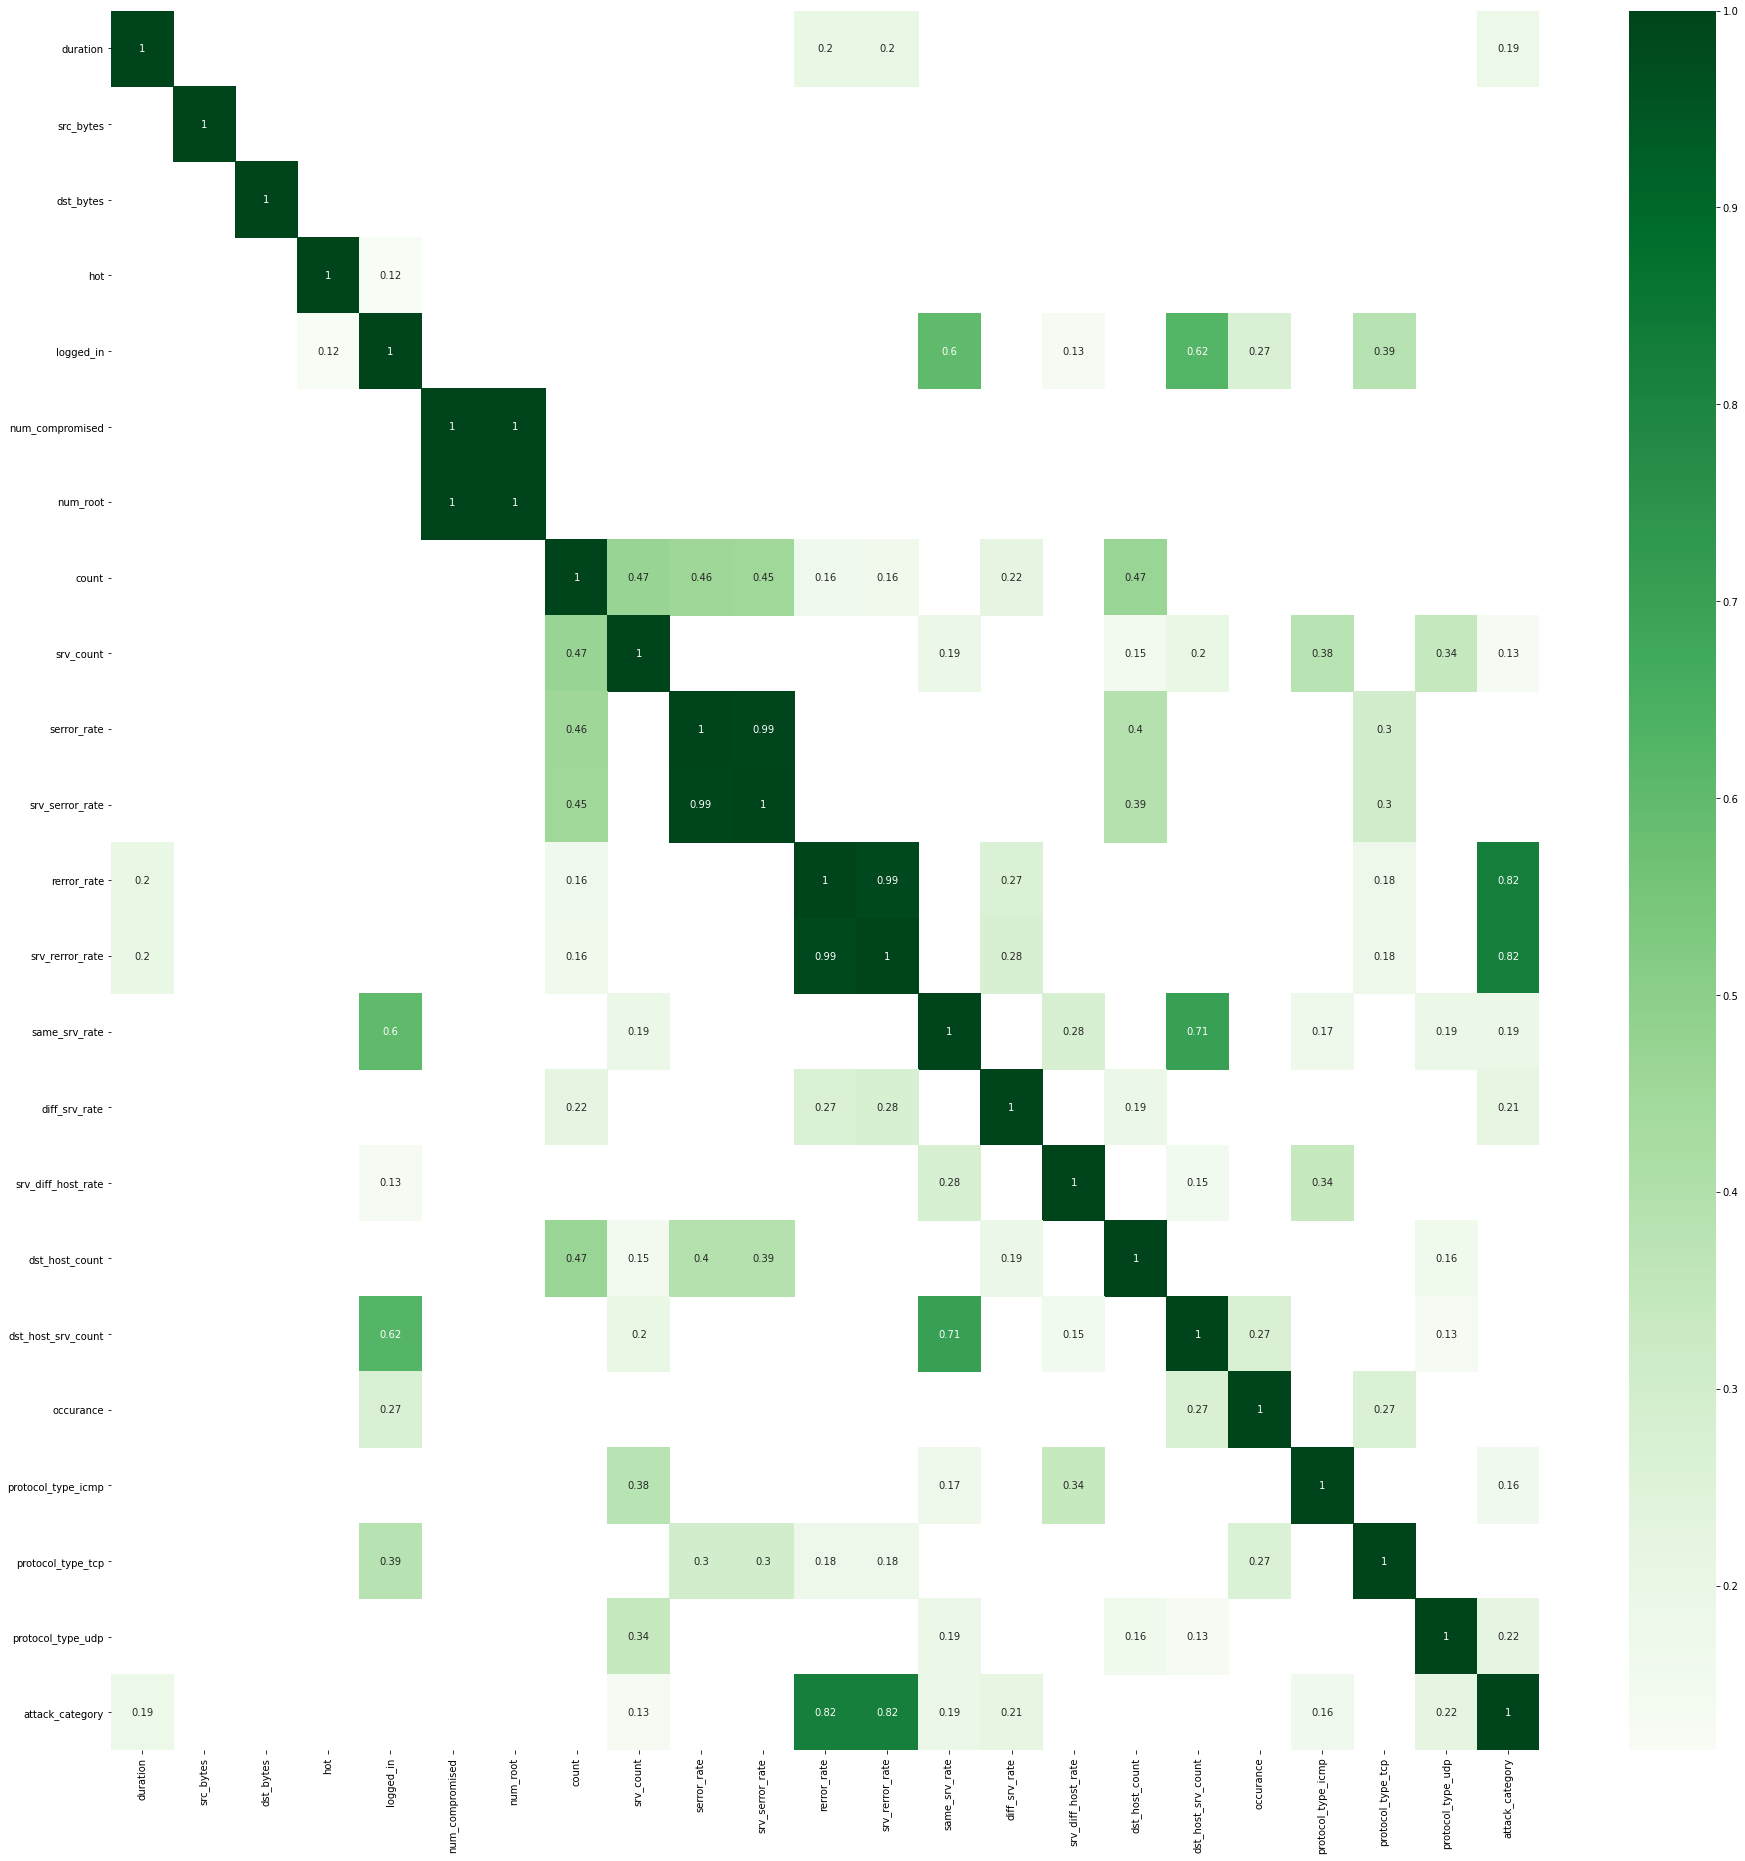

In [ ]:
#Observing correlations of each features in dataset
corrmat = df_unsupervised.corr()
kot = corrmat[corrmat>0.11]
plt.figure(figsize=(32,32))
#plot heat map
g=sns.heatmap(kot,annot=True,cmap="Greens")
#This heatmap indicates that the clusters obtained are not based on features on which real data is classified

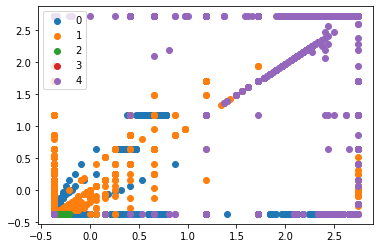

In [ ]:
#Visualizing clusters on rerror_rate(X axis) and srv_rerror_rate(Y axis)
u_labels = np.unique(predicted_unsupervised)
for i in u_labels:
    plt.scatter(X[predicted_unsupervised == i , 11] , X[predicted_unsupervised == i , 12] , label = i)
plt.legend()
plt.show()

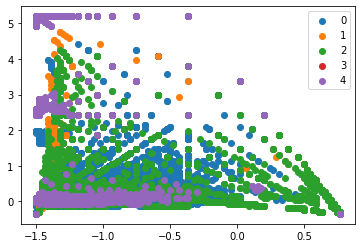

In [ ]:
#Visualizing clusters on same_srv_rate(X axis) and diff_srv_rate(Y axis)
u_labels = np.unique(predicted_unsupervised)
for i in u_labels:
    plt.scatter(X[predicted_unsupervised == i , 13] , X[predicted_unsupervised == i , 14] , label = i)
plt.legend()
plt.show()

In [ ]:
#Creating one hot encoded vectors for attack types
one_hot_vectors = pd.get_dummies(df_unsupervised.attack_category, prefix='attack_category')
#Droping attack category because it is not useful now
df_unsupervised = df_unsupervised.drop('attack_category',axis = 1)
#Appending one hot encoded vectors with the dataframe
df_unsupervised = df_unsupervised.join(one_hot_vectors)

In [ ]:
df_unsupervised.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,occurance,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,attack_category_0,attack_category_1,attack_category_2,attack_category_3,attack_category_4
0,0,491,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,20,0,1,0,0,0,1,0,0
1,0,146,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,15,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,19,0,1,0,1,0,0,0,0
3,0,232,8153,0,1,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,21,0,1,0,0,0,1,0,0
4,0,199,420,0,1,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,21,0,1,0,0,0,1,0,0


In [ ]:
#Preparing data for training and testing
X = df_unsupervised.iloc[:,:-5].values
Y = df_unsupervised.iloc[:,-5:].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)
standardscaler = StandardScaler()
standardscaler.fit(X_train)
X_train = standardscaler.transform(X_train)
X_test = standardscaler.transform(X_test)

In [ ]:
#Creating,training and saving 5 models
#Initialzing configurations
histories = []
n_models = 5
n_hidden = [1,2,2,2,1]
n_neurons = [
             [6],[10,5],[5,5],[16,8],[8]
]
n_callback_monitors = ['val_loss','val_accuracy','loss','accuracy','loss']
n_patience = [2,3,2,1,1]
n_epochs = [5,5,5,5,5]
#Loop to generate desired models
for i in range(0,n_models):
  model = create_model(n_hidden[i],n_neurons[i])
  print("Training model# "+str(i))
  model, hist = train_model(X_train,Y_train,model,n_callback_monitors[i],n_patience[i],n_epochs[i])
  histories.append(hist)
  path_to_save = "models_part3/model#" + str(i) +".h5"
  model.save(path_to_save)
  print("Model saved as " + path_to_save )

Training model# 0
Epoch 1/5
20/20 - 1s - loss: 1.8327 - accuracy: 0.3157 - val_loss: 1.7131 - val_accuracy: 0.3155
Epoch 2/5
20/20 - 0s - loss: 1.6326 - accuracy: 0.3366 - val_loss: 1.5305 - val_accuracy: 0.4260
Epoch 3/5
20/20 - 0s - loss: 1.4524 - accuracy: 0.5109 - val_loss: 1.3541 - val_accuracy: 0.6039
Epoch 4/5
20/20 - 0s - loss: 1.2794 - accuracy: 0.7098 - val_loss: 1.1896 - val_accuracy: 0.7400
Epoch 5/5
20/20 - 0s - loss: 1.1210 - accuracy: 0.7505 - val_loss: 1.0407 - val_accuracy: 0.7588
Model saved as models_part3/model#0.h5
Training model# 1
Epoch 1/5
20/20 - 1s - loss: 1.4969 - accuracy: 0.3135 - val_loss: 1.3615 - val_accuracy: 0.4105
Epoch 2/5
20/20 - 0s - loss: 1.2761 - accuracy: 0.4431 - val_loss: 1.1776 - val_accuracy: 0.4662
Epoch 3/5
20/20 - 0s - loss: 1.1113 - accuracy: 0.4691 - val_loss: 1.0343 - val_accuracy: 0.4767
Epoch 4/5
20/20 - 0s - loss: 0.9831 - accuracy: 0.4876 - val_loss: 0.9225 - val_accuracy: 0.5028
Epoch 5/5
20/20 - 0s - loss: 0.8815 - accuracy: 0.54

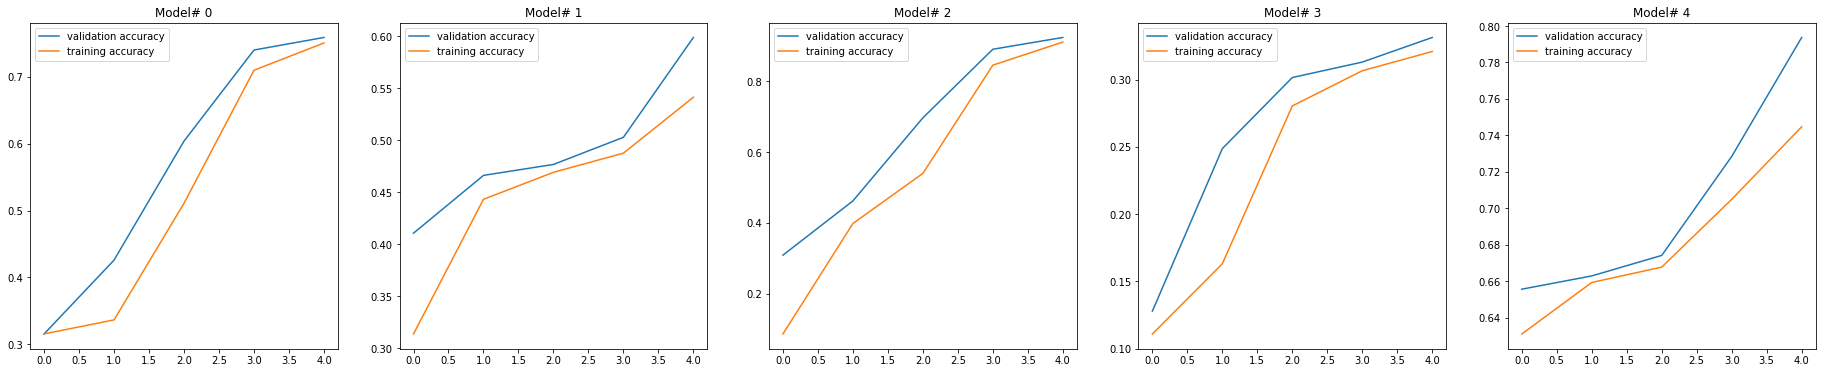

In [ ]:
#Plotting graphs of validation accuracy with respect to epochs
fig = plt.figure(figsize = (32,6))
for i in range(0,5):
  ax = fig.add_subplot(1,5,i+1)
  ax.set_title("Model# " + str(i))
  ax.plot(histories[i].history['val_accuracy'],label='validation accuracy')
  ax.plot(histories[i].history['accuracy'],label='training accuracy')
  ax.legend()

In [ ]:
#Loading all models
models_list = load_all_models(5,'models_part3')

loaded models_part3/model#0.h5
loaded models_part3/model#1.h5
loaded models_part3/model#2.h5
loaded models_part3/model#3.h5
loaded models_part3/model#4.h5


In [ ]:
#Evaluating individual models on test data
evaluate_models(X_test,Y_test,models_list)

Evaluating model# 0
Loss: 35.92356872558594 Accuracy: 0.10096423327922821
Evaluating model# 1
Loss: 38.70772171020508 Accuracy: 0.004921728745102882
Evaluating model# 2
Loss: 21.971418380737305 Accuracy: 0.7179902195930481
Evaluating model# 3
Loss: 28.131938934326172 Accuracy: 0.8635146617889404
Evaluating model# 4
Loss: 18.06977081298828 Accuracy: 0.9761322736740112


In [ ]:
#Creating ensemble model
nn,svc = create_ensembled_model(models_list,X_train,Y_train)

In [ ]:
#Getting predictions from ensemble model
pred = predict_ensembled_model(nn,svc,X_test)

In [ ]:
#Evaluating ensemble model on test data
ensembled_accuracy = evaluate_ensembled_model(Y_test,pred)
print("Ensemble model accuracy: " + str(ensembled_accuracy))

Ensemble model accuracy: 0.9985711564107449
